# Comparison of X-ray and tSZ derived cluster masses

In [1]:
import scienceplots
import matplotlib.pyplot as plt
import numpy as np
import cmbo

%matplotlib inline
%load_ext autoreload
%autoreload 2

/Users/rstiskalek/Projects/CMBOlympics/venv_cmbo/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
cfg = cmbo.utils.load_config("/Users/rstiskalek/Projects/CMBOlympics/scripts/config.toml")
data_MCXC = cmbo.io.load_mcxc_catalogue(cfg['paths']['MCXC_catalogue'])
data_eRASS = cmbo.io.load_erass_catalogue(cfg['paths']['eRASS_catalogue'])
data_tSZ = cmbo.io.read_Planck_cluster_catalog(cfg['paths']['Planck_tSZ_catalogue'])

Removing 94 MCXC entries with non-positive mass uncertainties.
Removing 1805 eRASS entries with M500 = -1.
Removing 1 eRASS entries with M500 > 3.00e+15 Msol.
Removing 559 Planck clusters with invalid redshifts (z <= 0 or NaN).


## tSZ - MCXC-II


Optimisation Results:
slope:	0.9939714074134827
intercept:	-0.07891733944416046
sig:	0.08617759495973587
mu_gauss:	0.5966857075691223
w_gauss:	0.216343492269516

Running MCMC


sample: 100%|██████████| 1500/1500 [00:01<00:00, 1137.79it/s, 3 steps of size 1.36e-01. acc. prob=0.92] 



                 mean       std    median      2.5%     97.5%     n_eff     r_hat
  intercept     -0.08      0.01     -0.08     -0.10     -0.05    707.91      1.00
   mu_gauss      0.60      0.01      0.60      0.58      0.61    725.20      1.00
        sig      0.09      0.00      0.09      0.08      0.09    551.18      1.00
      slope      0.99      0.02      0.99      0.95      1.03    713.41      1.00
    w_gauss      0.22      0.01      0.22      0.21      0.23    622.70      1.01

Number of divergences: 0


/var/folders/kv/90qm_jx508j4zhvy56lhf09m0000gn/T/ipykernel_94147/1976000748.py:43: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


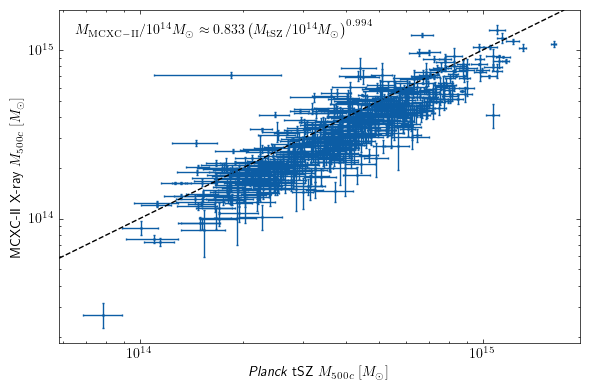

In [3]:
matches, ang_sep, dcz = cmbo.io.match_planck_to_mcxc(data_tSZ, data_MCXC, max_cz_diff_kms=500)
tSZ_matched, MCXC_matched = cmbo.io.build_matched_catalogues(data_tSZ, data_MCXC, matches)

M_tSZ = tSZ_matched["M500"]
e_M_tSZ = tSZ_matched["eM500"]

M_xray = MCXC_matched["M500"]
e_M_xray = MCXC_matched["eM500"]

fitter = cmbo.utils.LinearRoxyFitter()
res = fitter.fit(
    np.log10(M_tSZ), np.log10(M_xray),
    xerr=e_M_tSZ / (M_tSZ * np.log(10)), yerr=e_M_xray / (M_xray * np.log(10)),
    method="mnr", x_pivot=14, y_pivot=14, nsamp=1000)
fitter.print_summary()

a = np.mean(res["slope"])
b = np.mean(res["intercept"])

with plt.style.context('science'):
    fig, ax = plt.subplots(figsize=(6,4))
    ax.errorbar(M_tSZ, M_xray, xerr=e_M_tSZ, yerr=e_M_xray,
                fmt='o', capsize=1, ms=1)

    ax.axline([1e14, 1e14], slope=1, color='k', linestyle='--')

    ax.set_xscale("log")
    ax.set_yscale("log")

    ax.set_xlabel(r"\textit{Planck} tSZ $M_{500c} ~ [M_\odot]$")
    ax.set_ylabel(r"MCXC-II X-ray $M_{500c} ~ [M_\odot]$")

    ax.text(
        0.03, 0.97,
        rf"$M_{{\rm MCXC-II}} / 10^{{14}} M_\odot \approx {{{10**b:.3f}}}"
        rf"\left(M_{{\rm tSZ}}/ 10^{{14}} M_\odot\right)^{{{a:.3f}}}$",
        transform=ax.transAxes,
        va="top", ha="left"
    )

    fig.tight_layout()
    fig.savefig("/Users/rstiskalek/Downloads/mass_comparison_MCXC_tSZ.png", dpi=300)
    fig.show()

## tSZ - eROSITA

/Users/rstiskalek/Projects/CMBOlympics/cmbo/io/xray.py:316: DeprecationWarning: numpy.core is deprecated and has been renamed to numpy._core. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.records.
  np.core.records.fromarrays(arrays, names=",".join(keys)))
/Users/rstiskalek/Projects/CMBOlympics/cmbo/io/xray.py:316: DeprecationWarning: numpy.core is deprecated and has been renamed to numpy._core. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public


Optimisation Results:
slope:	0.8740293383598328
intercept:	0.18449407815933228
sig:	0.11429259181022644
mu_gauss:	0.6252240538597107
w_gauss:	0.21309703588485718

Running MCMC


sample: 100%|██████████| 1500/1500 [00:01<00:00, 1428.03it/s, 7 steps of size 1.71e-01. acc. prob=0.93] 



                 mean       std    median      2.5%     97.5%     n_eff     r_hat
  intercept      0.18      0.02      0.18      0.14      0.23    782.68      1.00
   mu_gauss      0.63      0.01      0.63      0.60      0.65    652.89      1.00
        sig      0.12      0.01      0.12      0.10      0.13    833.77      1.00
      slope      0.87      0.04      0.87      0.81      0.94    759.10      1.00
    w_gauss      0.21      0.01      0.21      0.19      0.23    518.00      1.00

Number of divergences: 0


/var/folders/kv/90qm_jx508j4zhvy56lhf09m0000gn/T/ipykernel_94147/1280297611.py:43: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


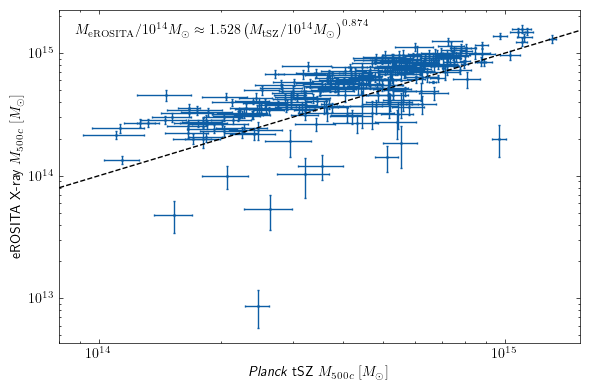

In [4]:
matches, ang_sep, dcz = cmbo.io.match_planck_to_erass(data_tSZ, data_eRASS, max_cz_diff_kms=500, max_sep_arcmin=30)
tSZ_matched, eRASS_matched = cmbo.io.build_matched_catalogues(data_tSZ, data_eRASS, matches)

M_tSZ = tSZ_matched["M500"]
e_M_tSZ = tSZ_matched["eM500"]

M_xray = eRASS_matched["M500"]
e_M_xray = eRASS_matched["eM500"]

fitter = cmbo.utils.LinearRoxyFitter()
res = fitter.fit(
    np.log10(M_tSZ), np.log10(M_xray),
    xerr=e_M_tSZ / (M_tSZ * np.log(10)), yerr=e_M_xray / (M_xray * np.log(10)),
    method="mnr", x_pivot=14, y_pivot=14, nsamp=1000)
fitter.print_summary()

a = np.mean(res["slope"])
b = np.mean(res["intercept"])

with plt.style.context('science'):
    fig, ax = plt.subplots(figsize=(6,4))
    ax.errorbar(M_tSZ, M_xray, xerr=e_M_tSZ, yerr=e_M_xray,
                fmt='o', capsize=1, ms=1)

    ax.axline([1e14, 1e14], slope=1, color='k', linestyle='--')

    ax.set_xscale("log")
    ax.set_yscale("log")

    ax.set_xlabel(r"\textit{Planck} tSZ $M_{500c} ~ [M_\odot]$")
    ax.set_ylabel(r"eROSITA X-ray $M_{500c} ~ [M_\odot]$")

    ax.text(
        0.03, 0.97,
        rf"$M_{{\rm eROSITA}} / 10^{{14}} M_\odot \approx {{{10**b:.3f}}}"
        rf"\left(M_{{\rm tSZ}}/ 10^{{14}} M_\odot\right)^{{{a:.3f}}}$",
        transform=ax.transAxes,
        va="top", ha="left"
    )

    fig.tight_layout()
    fig.savefig("/Users/rstiskalek/Downloads/mass_comparison_eROSITA_tSZ.png", dpi=300)
    fig.show()


Optimisation Results:
slope:	0.8947009444236755
intercept:	0.24972280859947205
sig:	0.11091291159391403
mu_gauss:	0.2495136559009552
w_gauss:	0.38748764991760254

Running MCMC


sample: 100%|██████████| 1500/1500 [00:01<00:00, 1390.41it/s, 15 steps of size 2.27e-01. acc. prob=0.93]



                 mean       std    median      2.5%     97.5%     n_eff     r_hat
  intercept      0.25      0.01      0.25      0.23      0.26   1080.95      1.00
   mu_gauss      0.25      0.02      0.25      0.21      0.29    691.00      1.00
        sig      0.11      0.01      0.11      0.10      0.12    665.54      1.00
      slope      0.89      0.02      0.90      0.86      0.93   1101.96      1.00
    w_gauss      0.39      0.01      0.39      0.36      0.41    731.52      1.00

Number of divergences: 0


/var/folders/kv/90qm_jx508j4zhvy56lhf09m0000gn/T/ipykernel_94147/1539398835.py:54: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


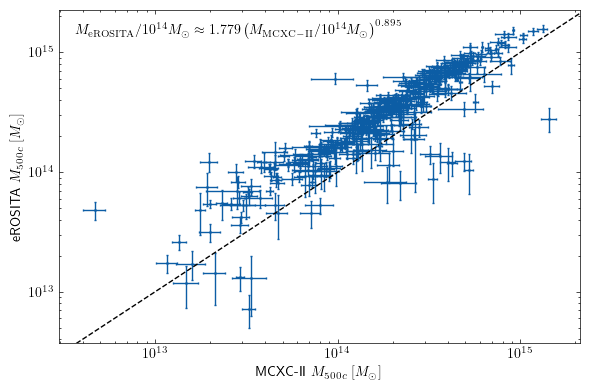

In [5]:
matches, ang_sep, dcz = cmbo.io.match_mcxc_to_erass(
    data_MCXC, data_eRASS,
    max_cz_diff_kms=500,
    max_sep_arcmin=15
)
MCXC_matched, eRASS_matched = cmbo.io.build_matched_catalogues(
    data_MCXC, data_eRASS, matches
)

M_MCXC = MCXC_matched["M500"]
e_M_MCXC = MCXC_matched["eM500"]

M_eRASS = eRASS_matched["M500"]
e_M_eRASS = eRASS_matched["eM500"]

fitter = cmbo.utils.LinearRoxyFitter()
res = fitter.fit(
    np.log10(M_MCXC), np.log10(M_eRASS),
    xerr=e_M_MCXC / (M_MCXC * np.log(10)), yerr=e_M_eRASS / (M_eRASS * np.log(10)),
    method="mnr", x_pivot=14, y_pivot=14, nsamp=1000)
fitter.print_summary()

a = np.mean(res["slope"])
b = np.mean(res["intercept"])

# --- Plot ---
with plt.style.context('science'):
    fig, ax = plt.subplots(figsize=(6,4))

    ax.errorbar(
        M_MCXC, M_eRASS,
        xerr=e_M_MCXC, yerr=e_M_eRASS,
        fmt='o', capsize=1, ms=1
    )

    ax.axline([1e14, 1e14], slope=1, color='k', linestyle='--')

    ax.set_xscale("log")
    ax.set_yscale("log")

    ax.set_xlabel(r"MCXC-II $M_{500c} ~ [M_\odot]$")
    ax.set_ylabel(r"eROSITA $M_{500c} ~ [M_\odot]$")

    ax.text(
        0.03, 0.97,
        rf"$M_{{\rm eROSITA}} / 10^{{14}} M_\odot \approx {{{10**b:.3f}}}"
        rf"\left(M_{{\rm MCXC-II}}/ 10^{{14}} M_\odot\right)^{{{a:.3f}}}$",
        transform=ax.transAxes,
        va="top", ha="left"
    )

    fig.tight_layout()
    fig.savefig("/Users/rstiskalek/Downloads/mass_comparison_MCXC_eRASS.png", dpi=300)
    fig.show()

In [ ]:
L_MCXC, 

array([4.405800e+43, 1.817760e+44, 2.686800e+43, 1.729580e+44,
       2.836420e+44, 2.681800e+43, 4.936000e+43, 2.179290e+44,
       7.339000e+42, 2.728340e+44, 9.561300e+43, 1.438150e+44,
       2.060620e+44, 7.100100e+43, 7.358600e+43, 1.821900e+43,
       7.543300e+43, 2.937200e+43, 8.866000e+42, 4.265280e+44,
       1.171600e+44, 3.357200e+43, 1.120210e+45, 3.762450e+44,
       4.518310e+44, 3.966600e+43, 6.158050e+44, 1.570280e+44,
       5.593600e+43, 1.734000e+43, 6.728000e+43, 3.877540e+44,
       3.378120e+44, 1.938300e+43, 8.587000e+42, 8.233700e+43,
       4.572000e+42, 6.886910e+44, 3.675140e+44, 3.883000e+42,
       3.165880e+44, 3.323700e+43, 1.026360e+44, 1.224720e+44,
       3.057500e+43, 4.487900e+43, 5.959300e+43, 1.040550e+44,
       1.831100e+43, 2.686000e+42, 1.398949e+45, 2.422000e+42,
       4.246000e+43, 2.571600e+44, 8.770000e+42, 3.872400e+43,
       8.201000e+43, 2.037000e+42, 2.917600e+43, 2.207900e+43,
       4.503600e+43, 2.757340e+44, 2.651000e+44, 4.8626

In [8]:
L_eRASS

array([3.910300e+45, 1.795820e+46, 1.172700e+45, 3.628900e+45,
       2.036470e+46, 1.231600e+45, 5.622700e+45, 1.794930e+46,
       9.817000e+44, 2.433380e+46, 7.171400e+45, 1.004000e+46,
       1.187520e+46, 8.259900e+45, 3.056500e+45, 1.707500e+45,
       6.165200e+45, 3.307500e+45, 2.080000e+45, 2.986100e+46,
       7.256400e+45, 2.176100e+45, 2.192520e+46, 2.841940e+46,
       2.753530e+46, 3.493200e+45, 4.900050e+46, 2.058680e+46,
       4.982800e+45, 1.410900e+45, 8.634000e+45, 2.790100e+45,
       3.223860e+46, 1.288100e+45, 8.190000e+44, 1.191440e+46,
       4.227000e+44, 4.839800e+46, 2.495650e+46, 3.929000e+44,
       3.273480e+46, 4.105900e+45, 9.429100e+45, 1.140850e+46,
       2.047600e+45, 3.929500e+45, 5.641500e+45, 5.329000e+45,
       3.895000e+44, 3.753000e+44, 1.004829e+47, 7.500000e+43,
       3.136000e+45, 7.769900e+45, 8.537000e+44, 2.634200e+45,
       9.754800e+45, 6.173000e+44, 2.093700e+45, 1.210000e+45,
       3.394200e+45, 2.249490e+46, 2.710200e+45, 4.4650


Optimisation Results:
slope:	0.9371928572654724
intercept:	-0.09792397916316986
sig:	0.13668356835842133
mu_gauss:	-0.0667344182729721
w_gauss:	0.6686647534370422

Running MCMC


sample: 100%|██████████| 1500/1500 [00:00<00:00, 1520.57it/s, 7 steps of size 3.55e-01. acc. prob=0.91]



                 mean       std    median      2.5%     97.5%     n_eff     r_hat
  intercept     -0.10      0.01     -0.10     -0.12     -0.08   1161.06      1.00
   mu_gauss     -0.07      0.04     -0.07     -0.13      0.00    572.87      1.00
        sig      0.14      0.01      0.14      0.12      0.16    583.01      1.00
      slope      0.94      0.01      0.94      0.91      0.96   1315.51      1.00
    w_gauss      0.67      0.03      0.67      0.62      0.72    633.52      1.00

Number of divergences: 0


/var/folders/kv/90qm_jx508j4zhvy56lhf09m0000gn/T/ipykernel_9771/3999669945.py:54: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


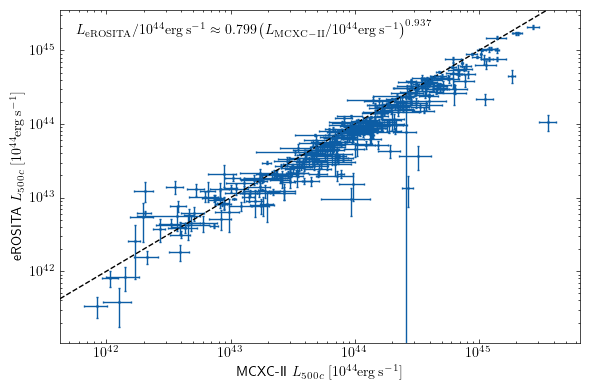

In [13]:
matches, ang_sep, dcz = cmbo.io.match_mcxc_to_erass(
    data_MCXC, data_eRASS,
    max_cz_diff_kms=300,
    max_sep_arcmin=5
)
MCXC_matched, eRASS_matched = cmbo.io.build_matched_catalogues(
    data_MCXC, data_eRASS, matches
)

L_MCXC = MCXC_matched["L500"]
e_L_MCXC = MCXC_matched["eL500"]

L_eRASS = eRASS_matched["L500"] * 1e-2
e_L_eRASS = eRASS_matched["eL500"] * 1e-2

fitter = cmbo.utils.LinearRoxyFitter()
res = fitter.fit(
    np.log10(L_MCXC), np.log10(L_eRASS),
    xerr=e_L_MCXC / (L_MCXC * np.log(10)), yerr=e_L_eRASS / (L_eRASS * np.log(10)),
    method="mnr", x_pivot=44, y_pivot=44, nsamp=1000)
fitter.print_summary()

a = np.mean(res["slope"])
b = np.mean(res["intercept"])

# --- Plot ---
with plt.style.context('science'):
    fig, ax = plt.subplots(figsize=(6,4))

    ax.errorbar(
        L_MCXC, L_eRASS,
        xerr=e_L_MCXC, yerr=e_L_eRASS,
        fmt='o', capsize=1, ms=1
    )

    ax.axline([1e44, 1e44], slope=1, color='k', linestyle='--')

    ax.set_xscale("log")
    ax.set_yscale("log")

    ax.set_xlabel(r"MCXC-II $L_{500c} ~ [10^{44} \mathrm{erg\,s}^{-1}]$")
    ax.set_ylabel(r"eROSITA $L_{500c} ~ [10^{44} \mathrm{erg\,s}^{-1}]$")

    ax.text(
        0.03, 0.97,
        rf"$L_{{\rm eROSITA}} / 10^{{44}} \mathrm{{erg\,s}}^{{-1}} \approx {{{10**b:.3f}}}"
        rf"\left(L_{{\rm MCXC-II}}/ 10^{{44}} \mathrm{{erg\,s}}^{{-1}}\right)^{{{a:.3f}}}$",
        transform=ax.transAxes,
        va="top", ha="left"
    )

    fig.tight_layout()
    fig.savefig("/Users/rstiskalek/Downloads/L_comparison_MCXC_eRASS.png", dpi=300)
    fig.show()